## 0.0 SOLUTION PLAN ( IOT )

### INPUT

Bussines Problem

1. Selecionar os mais valiosos clientes para formar o programa de fidelidade **"INSIDERS"**
2. Conjunto de dados com as vendas de produtos durante 1 ano ( Nov 2015 to Dec 2017 )

### OUTPUT

1. A indicação de pessoas para fazer parte do programa de fidelidade **"INSIDERS"**.
2. Relatório com as respostas para as seguintes perguntas:
    - Quem são as pessoas elegíveis para participar do programa de Insiders ?
    - Quantos clientes farão parte do grupo?
    - Quais as principais características desses clientes ?
    - Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?
    - Qual a expectativa de faturamento desse grupo para os próximos meses ?
    - Quais as condições para uma pessoa ser elegível ao Insiders ?
    - Quais as condições para uma pessoa ser removida do Insiders ?
    - Qual a garantia que o programa Insiders é melhor que o restante da base ?
    - Quais ações o time de marketing pode realizar para aumentar o faturamento?

### TASKS

1. **Quem são as pessoas elegíveis para participar do programa de Insiders ?**
    - O que é ser elegível ? O que é um cliente "valioso" para a empresa ?
        - Faturamento:
            - Alto Ticket Médio
            - Alto LTV
            - Baixa Recência ou Alta Frequência ( tempo entre as compras )
            - Alto Basket Size ( quantidade média de produtos comprados )
            - Baixa probabilidade de Churn
            - Previsão alta de LTV
            - Alta propensão de compra

        - Custo:
            - Baixo número de devoluções

        - Experiência:  
            - Média alta de avaliações
            
            
2. **Quantos clientes farão parte do grupo?**
    - Número de clientes
    - % em relação ao total de clients
    
    
3. **Quais as principais características desses clientes ?**
    - Escrever os principais atributos dos clientes
        - Idade
        - País
        - Salário
        
    - Escrever os principais comportamentos de compra dos clients ( métricas de negócio )
        - Vide acima
    
    
4. **Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?**
    - Calcular o faturamento total da empresa durante o ano.
    - Calcular o faturamento (%) apenas do cluster Insiders.
    
    
5. **Qual a expectativa de faturamento desse grupo para os próximos meses ?**
    - Cálculo do LTV do grupo Insiders
    - Séries Temporais ( ARMA, ARIMA, HoltWinter, etc )
    

6. **Quais as condições para uma pessoa ser elegível ao Insiders ?**
    - Qual o período de avaliação ?
    - O "desempenho" do cliente está próximo da média do cluster Insiders. 
    
    
7. **Quais as condições para uma pessoa ser removida do Insiders ?**
    - O "desempenho" do cliente não está mais próximo da média do cluster Insiders. 
    
    
8. **Qual a garantia que o programa Insiders é melhor que o restante da base ?**
    - Teste de Hipóteses
    - Teste A/B
    
    
9. **Quais ações o time de marketing pode realizar para aumentar o faturamento?**
    - Descontos
    - Preferências de escolha
    - Produtos exclusivos

## 0.1 IMPORTS

In [79]:
import regex as re
import pandas as pd
import numpy as np
import seaborn as sns
import inflection

from matplotlib import pyplot as plt
from plotly import express as px 

import umap.umap_ as umap  # pip install umap_learn

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn import cluster as c
from sklearn import metrics


import warnings
warnings.filterwarnings("ignore")

In [2]:
#setting default style for the graphs
sns.set_style("whitegrid")
#setting default text size
sns.set(font_scale=1.2)


In [3]:
df_raw = pd.read_csv(r'C:\Data_Science\repos\pa005_insiders_clustering\Insiders Clustering joao breda\data\raw\Ecommerce.csv')
df_raw

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

       InvoiceDate  UnitPrice  CustomerID         Country  Unnamed: 8  
0        29-Nov-16       2.55     17850.0  United Kingdom         NaN  
1        29-Nov-16       3.39     17850.0  United Kingdom         NaN  
2        29-Nov-16       2.75     17850.0  United Kingdom         NaN  
3        29-Nov-16       3.39     17850.0  United Kingdom         NaN  
4        29-Nov-16       3.39     17850.0  United Kingdom         NaN  
...            ...        ...         ...             ...         ...  
541904    7-Dec-17       0.85     12680.0          France         NaN  
541905    7-Dec-17       2.10     12680.0          France         NaN  
541906    7-Dec-17       4.15     12680.0          France         NaN  
541907    7-Dec-17       4.15     12680.0          France         NaN  
541908    7-Dec-17       4.95     12680.0          France         NaN  

[541909 rows x 9 columns]

## 1 DATA DESCRIPTION

In [4]:
df1 = df_raw.copy() 

### 1.1 COLUMNS RENAMING 

In [5]:
df1.columns 

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Unnamed: 8'],
      dtype='object')

In [6]:
#renaming column names to all low cases separated by '_'
cols_old = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
           'UnitPrice', 'CustomerID', 'Country', 'Unnamed: 8']

df1.columns = [inflection.underscore(x) for x in cols_old]

### 1.2 DATA DIMENSIONS

In [7]:
print('Number of rows: {}'. format(df1.shape[0]))
print('Number of columns: {}'. format(df1.shape[1]))

Number of rows: 541909
Number of columns: 9


### 1.3 DATA TYPES

In [8]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
unnamed: 8      float64
dtype: object

### 1.4 NA CHECK

In [9]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
unnamed: 8      541909
dtype: int64

### 1.5 NA FILLOUT

There are NA's in columns 'description', 'customer_id' and 'unnamed: 8'.

'unnamed: 8' was droped, there were only NA's.

'description' there are 1454 NA's, don't judge this important, will be droped after EDA.

'customer_id' has 25% of rows as NA's, this is important. 

In [10]:
# 'unnamed: 8' there are only NA's, thus will be dropped
df1 = df1.drop(columns=['unnamed: 8'])

'customer_id' NA fillout strategy:

It will be fillout with values that doesn't already exists in the data (with a sequence above the max value for customer_id.

Although ins't possible to link this arbritary values with a real client (for now), the strategy here is to take advantage of the shopping patterns embedded in this data to train the model (it accounts for 25% of the data, thus it's relevant). 

In [11]:
# for rows without customer_id, will group by invoice_no and then will associate this invoice_no with
# a new customer_id

#separating missing customer_id from non missing values 
df_missing = df1.loc[df1['customer_id'].isna(), :]

#getting only unique invoice_no, no other columns
df_backup = pd.DataFrame(df_missing['invoice_no'].drop_duplicates())

#setting customer_id 
df_backup['customer_id'] = np.arange( 19000, 19000+len( df_backup ), 1)

# merge original with reference dataframe
df1 = pd.merge( df1, df_backup, on='invoice_no', how='left' )

# coalesce - this function fill NA's in the calling column 'customer_id_x' with values from the called 
# column 'customer_id_y'
df1['customer_id'] = df1['customer_id_x'].combine_first( df1['customer_id_y'] )

# drop support columns
df1 = df1.drop( columns=['customer_id_x', 'customer_id_y'], axis=1 )

In [12]:
df1.isna().sum()

invoice_no         0
stock_code         0
description     1454
quantity           0
invoice_date       0
unit_price         0
country            0
customer_id        0
dtype: int64

### 1.6 CHANGE TYPES

In [13]:
#date it's as object type type, must pass to date time
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'])

#cutomer_id as float to int
df1['customer_id'] = df1['customer_id'].astype( int )


In [14]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
country                 object
customer_id              int32
dtype: object

### 1.7 STATISTICAL DESCRIPTION

In [15]:
num_attributes = df1.select_dtypes( include=['int64', 'int32', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'int32', 'float64', 'datetime64[ns]'] )

####  1.7.1 NUMERICAL ATTRIBUTES

In [16]:
# central tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T
             
# dispersion - desvio padrão, minimo, maximo, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( np.min ) ).T
d3 = pd.DataFrame( num_attributes.apply( np.max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

attributes       min      max      range          mean    median  \
0     quantity -80995.00  80995.0  161990.00      9.552250      3.00   
1   unit_price -11062.06  38970.0   50032.06      4.611114      2.08   
2  customer_id  12346.00  22709.0   10363.00  16688.840453  16249.00   

           std        skew       kurtosis  
0   218.080957   -0.264076  119769.160031  
1    96.759764  186.506972   59005.719097  
2  2911.408666    0.487449      -0.804287

 <font color='red'> Questions raised above

- negative quantity : what it is ? devolution ?
- unit_price min = 0 : promotion ?
- unit_price min < 0 : what it means ?


##### 1.7.1.1  -  ' unity_price'

In [17]:
# what is 'unity_price' = 0 ?
df1.loc[df1['unit_price'] == 0.0, :].sample(10)

invoice_no stock_code            description  quantity invoice_date  \
14061      537450      20684                    NaN       -19   2016-12-05   
108682     545560      37464                    NaN        -2   2017-03-01   
220844     556232      21135  sold as set on dotcom      -304   2017-06-07   
479162     577144      22759                  found        96   2017-11-16   
20469      538054     85167B                    NaN       -24   2016-12-07   
220843     556231     85123A                      ?      4000   2017-06-07   
65077      541687     46000S                 Dotcom      -300   2017-01-18   
221959     556299      21937                      ?      -161   2017-06-08   
404760     571689     85135B                    NaN       -27   2017-10-16   
20400      538047      21429                    NaN       -70   2016-12-07   

        unit_price         country  customer_id  
14061          0.0  United Kingdom        19091  
108682         0.0  United Kingdom        19768  
220844         0.0  United Kingdom        20862  
479162         0.0  United Kingdom        22456  
20469          0.0  United Kingdom        19149  
220843         0.0  United Kingdom        20861  
65077          0.0  United Kingdom        19441  
221959         0.0  United Kingdom        20875  
404760         0.0  United Kingdom        22058  
20400          0.0  United Kingdom        19148

'Unity_price' equals 0 doesn't seem to represent a particular pattern. 

In this set of unity_price, there are positives and negatives values on 'quantity'. There are several distincts 'description' there it isn't describing products. This set of rows will be cleaned from the df.

In [18]:
df1[df1['unit_price'].gt(0) & df1['unit_price'].lt(0.10)].groupby('description').\
                        agg({'unit_price':np.mean, 'description':'count'}).sort_values(by='unit_price')

unit_price  description
description                                                 
Bank Charges                           0.001000            1
PADS TO MATCH ALL CUSHIONS             0.001000            3
Discount                               0.020000            2
ROTATING SILVER ANGELS T-LIGHT HLDR    0.030000            1
POPART WOODEN PENCILS ASST             0.040000           66
ESSENTIAL BALM 3.5g TIN IN ENVELOPE    0.060000            2
HOUSE SHAPE PENCIL SHARPENER           0.060000           39
LETTER SHAPE PENCIL SHARPENER          0.060000           30
CARTOON  PENCIL SHARPENERS             0.060000           45
PAPER POCKET TRAVELING FAN             0.070000            6
PORCELAIN BUDAH INCENSE HOLDER         0.070000            3
Manual                                 0.074167           12
BLUE STONES ON WIRE FOR CANDLE         0.080000           17
SMALL FOLDING SCISSOR(POINTED EDGE)    0.080000            1
PIECE OF CAMO STATIONERY SET           0.080000           28
ASS DES PHONE SPONGE CRAFT STICKER     0.090000            2

From above we can conclude that the only relevant items are those with unit_prices bellow than 'POPART WOODEN PENCILS ASST'. Those items have low count and suspicious low values. Those will be cleanned from the df.

Another detail that call to attention it´s the 'description' item 'manual'. It has variable unit_prices, and it seen to not represent a item.

Thus, items with unit_price bellow 0.04 and item 'manual' will be cleanned from the df.



In [19]:
#what is unit_price lesse than 0 ?
df1[df1['unit_price'] < 0]

invoice_no stock_code      description  quantity invoice_date  \
299983    A563186          B  Adjust bad debt         1   2017-08-10   
299984    A563187          B  Adjust bad debt         1   2017-08-10   

        unit_price         country  customer_id  
299983   -11062.06  United Kingdom        21498  
299984   -11062.06  United Kingdom        21499

There is only 2 exemples with this caracteristic. They are linked with the type of 'invoice_no' with 'A' on it it's number, as we area going to see just bellow on section  1.7.2.1.

There are going to be cleanned from the df.

##### 1.7.1.2 -  'quantity'

Negative quantities is devolution, as we are about to see in section 1.7.2.1 just bellow.

####  1.7.2 CATEGORICAL ATTRIBUTES

##### 1.7.2.1  -  ' invoice_no '

In [20]:
#there is letters in invoice_no, it could sinalize invoice type

#getting only letters from invoice_no
df1['invoice_type'] = df1['invoice_no'].apply(lambda x: re.findall('[a-zA-Z]+', x))
#seeting invoice_type column, '1' will be set for now letters invoice_no
df1['invoice_type'] = df1['invoice_type'].apply(lambda x: x[0] if len(x)>0 else '1')

print("Invoice types")
print(df1['invoice_type'].unique())
print("\n Total  Count")
print(df1['invoice_type'].value_counts())
print("\n Percentage")
print(df1['invoice_type'].value_counts(normalize=True))


Invoice types
['1' 'C' 'A']

 Total  Count
1    532618
C      9288
A         3
Name: invoice_type, dtype: int64

 Percentage
1    0.982855
C    0.017139
A    0.000006
Name: invoice_type, dtype: float64


In [21]:
# what is invoice type 'A' ?
df1[df1['invoice_type'] == 'A']

invoice_no stock_code      description  quantity invoice_date  \
299982    A563185          B  Adjust bad debt         1   2017-08-10   
299983    A563186          B  Adjust bad debt         1   2017-08-10   
299984    A563187          B  Adjust bad debt         1   2017-08-10   

        unit_price         country  customer_id invoice_type  
299982    11062.06  United Kingdom        21497            A  
299983   -11062.06  United Kingdom        21498            A  
299984   -11062.06  United Kingdom        21499            A

Above we see that invoice type A it's very unsual and have a strange behaviour. 

Will clean it from the df in the next section.

In [22]:
# what is invoice_type 'C' ?
df1[df1['invoice_type'] == 'C'].head()

invoice_no stock_code                       description  quantity  \
141    C536379          D                          Discount        -1   
154    C536383     35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235    C536391      22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236    C536391      21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237    C536391      21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

    invoice_date  unit_price         country  customer_id invoice_type  
141   2016-11-29       27.50  United Kingdom        14527            C  
154   2016-11-29        4.65  United Kingdom        15311            C  
235   2016-11-29        1.65  United Kingdom        17548            C  
236   2016-11-29        0.29  United Kingdom        17548            C  
237   2016-11-29        0.29  United Kingdom        17548            C

By it's pattern, quantity being negative, we notice that the 'C' transaction it's devolution. 

Let´s confirm it.

In [23]:
#this proves that are only negatives values on 'quantity' being 'invoice_type' C
print(df1[df1['invoice_type'] == 'C']['quantity'].sum())
print(df1[df1['invoice_type'] == 'C']['quantity'].abs().sum())

-277574
277574


Yes, invoice_type 'C' it´s devolution.

For now as invoice_type is buying or devolution, invoice_type can be understood as a boolean of "is_devolution".

In [24]:
#renaming columns
df1.rename(columns={'invoice_type': 'is_devolution'}, inplace=True)

#setting as boolean
df1['is_devolution'] = df1['is_devolution'].apply(lambda x: 1 if x == 'C' else 0 )

##### 1.7.2.2 -  ' stock_code '

In [25]:
# check stock codes only characters
df1.loc[df1['stock_code'].apply( lambda x: bool( re.search( '^[a-zA-Z]+$', x ) ) ), 
           'stock_code'].unique()

array(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK'], dtype=object)

As we don't know what those stock codes are, for now we are cleaning the df from this values in the next section


##### 1.7.2.3 -  ' Description '

In [26]:
df1.head()

invoice_no stock_code                          description  quantity  \
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365      71053                  WHITE METAL LANTERN         6   
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

  invoice_date  unit_price         country  customer_id  is_devolution  
0   2016-11-29        2.55  United Kingdom        17850              0  
1   2016-11-29        3.39  United Kingdom        17850              0  
2   2016-11-29        2.75  United Kingdom        17850              0  
3   2016-11-29        3.39  United Kingdom        17850              0  
4   2016-11-29        3.39  United Kingdom        17850              0

For now there is no use for 'description'. It will be erased in the next section.

##### 1.7.2.4  -   ' coutnry '

In [27]:
df1['country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [28]:
# % of operations by country
df1['country'].value_counts( normalize=True ).head(10)

United Kingdom    0.914320
Germany           0.017521
France            0.015790
EIRE              0.015124
Spain             0.004674
Netherlands       0.004375
Belgium           0.003818
Switzerland       0.003694
Portugal          0.002803
Australia         0.002323
Name: country, dtype: float64

In [29]:
# number of customers by country
df1[['customer_id', 'country']].drop_duplicates().groupby( 'country' ).count().reset_index().\
                                sort_values( 'customer_id', ascending=False).head(10)

country  customer_id
36  United Kingdom         7587
14         Germany           95
13          France           90
10            EIRE           44
31           Spain           31
3          Belgium           25
33     Switzerland           24
27        Portugal           20
19           Italy           15
16       Hong Kong           15

## 2 DATA FILTERING

In [30]:
df2 = df1.copy()

In [31]:
df2.dtypes

invoice_no               object
stock_code               object
description              object
quantity                  int64
invoice_date     datetime64[ns]
unit_price              float64
country                  object
customer_id               int32
is_devolution             int64
dtype: object

In [32]:
#  Numerical attributes
df2 = df2.loc[df2['unit_price'] >= 0.04, :]


#  Categorical attributes 
df2 = df2[~df2['stock_code'].isin( ['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
                                    'DCGSSGIRL', 'PADS', 'B', 'CRUK'] )]

# country to take out
df2 = df2[~df2['country'].isin( ['European Community', 'Unspecified' ] ) ]


# dropping rows with invoice type 'A'
# this was already done, cause invoice_type 'A' were 'stock_code' 'B', that was taken out just above

# description
df2 = df2.drop( columns='description', axis=1 )

## 3 FEATURE ENGINEERING

In [33]:
df3 = df2.copy()

### 3.1 GROOS REVENUE 

In [34]:
#getting total amount spent in every transaction
df3['gross_revenue'] = df3[['quantity', 'unit_price']].apply(lambda x: x[0]*x[1], axis=1)

### 3.2 TOTAL DEVOLUTIONS / TOTAL BOUGHT 

In [35]:
#separating buying from devolution 
df3['total_devol'] = df3[['gross_revenue', 'is_devolution']].apply(lambda x: x['gross_revenue'] if \
                                                             x['is_devolution'] == 1 else 0, axis=1)

df3['total_bought'] = df3[['gross_revenue', 'is_devolution']].apply(lambda x: x['gross_revenue'] if \
                                                             x['is_devolution'] == 0 else 0, axis=1)

### 3.3 AVERAGE TICKET 

In [36]:
df3['avg_ticket'] = df3['total_bought']

In [37]:
df3grouped = df3.groupby(['customer_id',]).agg({'country':', '.join, 'is_devolution':np.sum, 
                                                'total_devol':np.sum, 'total_bought':np.sum, 
                                                'gross_revenue':np.sum, 'avg_ticket': np.mean}).round(2)

In [38]:
#trick to place one country name after grouping: add '/' at the end of the string (to get when there is no ',')
#and then do a findall with a look ahed of ',' or '/'.
df3grouped['country'] = df3grouped['country'].apply(lambda x: x + '/')
df3grouped['country'] = df3grouped['country'].apply(lambda x:  re.findall('[\w\ ]+(?=[,|/])', x)[0] )

### 3.4 RECENCY

In [39]:
#getting last purchase date for every customer
df_recency = df3.loc[df3['is_devolution'] == 0, ['customer_id', 'invoice_date']].groupby('customer_id').\
                                                                agg({'invoice_date':'max'}).reset_index()
#getting recency in days
df_recency['recency'] = ( df3['invoice_date'].max() - df_recency['invoice_date'] ).dt.days

df_recency = df_recency[['customer_id', 'recency']].copy()

df3_aux1 = pd.merge( df3grouped, df_recency, on='customer_id', how='left' )

In [40]:
df3_aux1.isna().sum()

customer_id       0
country           0
is_devolution     0
total_devol       0
total_bought      0
gross_revenue     0
avg_ticket        0
recency          91
dtype: int64

In [41]:
# fill NA with max 'recency'
df3_aux1['recency'].fillna(df_recency['recency'].max(), inplace=True)

### 3.5 MEAN RECENCY

<font color='red'> MEIGA VERSION IS WRONG HERE, HE USED THE WHOLE DF, NOT JUST PURCHASES

In [42]:
#getting only customer_id and invoice_date, no duplicates
df_mean_recency = df3.loc[df3['is_devolution'] == 0, ['customer_id', 'invoice_date']].drop_duplicates().\
                                sort_values(['customer_id', 'invoice_date'], ascending = ['False','False'])

#shifiting customer_id, so i can compare dates to make the difference
df_mean_recency['next_customer_id'] = df_mean_recency['customer_id'].shift()

#shifiting invoice_date, so every invoice_date can compare to the next date, on the same row
df_mean_recency['previous_date'] = df_mean_recency['invoice_date'].shift() 

#making the difference of the dates, if the cutomer_id is the same
df_mean_recency['mean_recency_days'] = df_mean_recency.apply( lambda x: ( x['invoice_date'] - \
               x['previous_date'] ).days if x['customer_id'] == x['next_customer_id'] else np.nan, axis=1 )

#getting only what matters here
df_mean_recency = df_mean_recency[['customer_id', 'mean_recency_days']]

#mean recency
df_mean_recency = df_mean_recency.groupby('customer_id').mean().reset_index()

df3_aux1 = pd.merge(df3_aux1, df_mean_recency, on='customer_id', how='left')

In [43]:
df3_aux1.isna().sum()

customer_id             0
country                 0
is_devolution           0
total_devol             0
total_bought            0
gross_revenue           0
avg_ticket              0
recency                 0
mean_recency_days    3013
dtype: int64

In [44]:
df3_aux1['mean_recency_days'].fillna(df3_aux1['mean_recency_days'].max() * 1.5 , inplace=True)

In [45]:
df3_aux1

customer_id         country  is_devolution  total_devol  total_bought  \
0           12346  United Kingdom              1     -77183.6      77183.60   
1           12347         Iceland              0          0.0       4310.00   
2           12348         Finland              0          0.0       1437.24   
3           12349           Italy              0          0.0       1457.55   
4           12350          Norway              0          0.0        294.40   
...           ...             ...            ...          ...           ...   
5782        22705  United Kingdom              0          0.0          3.35   
5783        22706  United Kingdom              0          0.0       5699.00   
5784        22707  United Kingdom              0          0.0       6756.06   
5785        22708  United Kingdom              0          0.0       3217.20   
5786        22709  United Kingdom              0          0.0       3950.72   

      gross_revenue  avg_ticket  recency  mean_recency_days  
0              0.00    38591.80    325.0         549.000000  
1           4310.00       23.68      2.0          60.833333  
2           1437.24       53.23     75.0          94.333333  
3           1457.55       20.24     18.0         549.000000  
4            294.40       18.40    310.0         549.000000  
...             ...         ...      ...                ...  
5782           3.35        1.68      1.0         549.000000  
5783        5699.00        8.99      1.0         549.000000  
5784        6756.06        9.25      0.0         549.000000  
5785        3217.20       54.53      0.0         549.000000  
5786        3950.72       18.21      0.0         549.000000  

[5787 rows x 9 columns]

### 3.6 TOTAL PURCHASES 

In [46]:
# total of purchases por each customer = total number of invoices 
df_purchases = df3.loc[df3['is_devolution'] == 0, ['customer_id', 'invoice_no']].drop_duplicates().\
                                                        groupby('customer_id').count().reset_index()

df_purchases.rename(columns={'invoice_no':'total_purchases'}, inplace=True)

df3_aux1 = pd.merge(df3_aux1, df_purchases, on='customer_id', how='left')
                                    

In [47]:
df3_aux1.isna().sum()

customer_id           0
country               0
is_devolution         0
total_devol           0
total_bought          0
gross_revenue         0
avg_ticket            0
recency               0
mean_recency_days     0
total_purchases      91
dtype: int64

In [48]:
# Fill NA with ZERO, no purchases !
df3_aux1['total_purchases'].fillna(0, inplace=True)

### 3.7 TOTAL PRODUCTS UNITS PURCHASED

<font color='red'> I THINK THAT HERE THE MEIGA VERSION IS WRONG

In [49]:
df_total_units = df3.loc[df3['is_devolution'] == 0, ['customer_id', 'quantity']].groupby('customer_id').\
                                                                                sum().reset_index()

df_total_units.rename(columns={'quantity':'total_unitys'}, inplace=True)

df3_aux1 = pd.merge(df3_aux1, df_total_units, on='customer_id', how='left')

In [50]:
df3_aux1.isna().sum()

customer_id           0
country               0
is_devolution         0
total_devol           0
total_bought          0
gross_revenue         0
avg_ticket            0
recency               0
mean_recency_days     0
total_purchases       0
total_unitys         91
dtype: int64

In [51]:
# Fill NA with ZERO, no unity purchased !
df3_aux1['total_unitys'].fillna(0, inplace=True)

### 3.X  RECENCY AND MEAN RECENCY MADE BY DICT

In [52]:
#setting a empty dict, with customer_id as keys, to add latter dates
x = df3['customer_id'].unique()
customers_dates_dict = {}
customers_mean_recency_dict = {}
customers_freq_dict = {}
recency = {}

#seeting vallues as empty list, to be possible to append values, in this case dates
for i in x:
    customers_dates_dict[i] = []
    customers_mean_recency_dict[i] = []
    customers_freq_dict[i] = 0
    recency[i] = []
    

In [53]:
#getting every date for a given customer and getting FREQUENCY
for index, row in df3.iterrows():
    customers_freq_dict[row['customer_id']] += 1 #devolution compensation will be done bellow
    if row['invoice_date'] not in customers_dates_dict[row['customer_id']]:
        customers_dates_dict[row['customer_id']].append(row['invoice_date'])

In [54]:
#making a df from the above FREQUENCY dict 
df_frequency = pd.DataFrame.from_dict(customers_freq_dict, orient = 'index')
df_frequency.rename(columns={0: 'frequency'}, inplace=True)

#merging with main df
df3grouped = pd.merge(df3grouped, df_frequency, how='inner', left_index=True, right_index=True)

#to compensate devolution - it's 2*['is_devolution'] because we have to subtract the devolution
#operation and the buy opperation that cause the devolution
df3grouped['frequency'] = df3grouped[['is_devolution','frequency']].apply(lambda x: \
                            x['frequency']-(2*x['is_devolution']) , axis=1)

In [55]:
#after a merge, NA check
df3grouped.isna().sum()

country          0
is_devolution    0
total_devol      0
total_bought     0
gross_revenue    0
avg_ticket       0
frequency        0
dtype: int64

In [56]:
#calculating MEAN RECENCY for each customer, and putting in the dict
for i in customers_dates_dict:
    freq = []
    if len(customers_dates_dict[i]) == 1:
        freq.append(400) #NOT SURE WHAT VALUE TO PUT HERE, MODEL MUST VALUE LOWER VALUES FOR THIS FEATURE
    else:
        for d in range(len(customers_dates_dict[i]) - 1):
            freq.append((customers_dates_dict[i][d+1] - customers_dates_dict[i][d]).days)
                
    customers_mean_recency_dict[i] = np.mean(freq).round(2)

In [57]:
#making a df from he above dict 
df_mean_recency = pd.DataFrame.from_dict(customers_mean_recency_dict, orient = 'index')
df_mean_recency.rename(columns={0: 'mean_recency'}, inplace=True)

#merging with main df
df3grouped = pd.merge(df3grouped, df_mean_recency, how='inner', left_index=True, right_index=True)

In [58]:
df_mean_recency.reset_index().sort_values('index')

index  mean_recency
1381  12346        400.00
471   12347         60.83
965   12348         94.33
5567  12349        400.00
1696  12350        400.00
...     ...           ...
5781  22705        400.00
5782  22706        400.00
5783  22707        400.00
5784  22708        400.00
5785  22709        400.00

[5787 rows x 2 columns]

In [59]:
#after a merge, NA check
df3grouped.isna().sum()

country          0
is_devolution    0
total_devol      0
total_bought     0
gross_revenue    0
avg_ticket       0
frequency        0
mean_recency     0
dtype: int64

In [60]:
#calculating RECENCY
#this is the date condition to calculate recency - provisory
x = max(df3['invoice_date'])

#calculating recency and saving into a dict
for i in customers_dates_dict:
    recency[i] = (x - customers_dates_dict[i][-1]).days

#making a df from he above dict 
df_recency = pd.DataFrame.from_dict(recency, orient = 'index')
df_recency.rename(columns={0: 'recency'}, inplace=True)

#merging with main df
df3grouped = pd.merge(df3grouped, df_recency, how='inner', left_index=True, right_index=True)

### 3.1 RFM  REFERENCY MODEL FEATURES


In [61]:
def set_score(x):
    if x < (0.2 * len(df3grouped)):
        return 5
    elif x < (0.4 * len(df3grouped)):
        return 4
    elif x < (0.6 * len(df3grouped)):
        return 3
    elif x < (0.8 * len(df3grouped)):
        return 2
    else:
        return 1
    

In [62]:
#setting Monetary score
df2_aux1 = df3grouped.sort_values(by=['gross_revenue'], ascending=False).reset_index().reset_index()

df2_aux1['M_score'] = df2_aux1['level_0'].apply(lambda x: set_score(x))

In [63]:
#setting Frequency score
df2_aux2 = df2_aux1.drop(columns=['level_0']).sort_values(by=['frequency'], ascending=False)

df2_aux2 = df2_aux2.reset_index().drop(columns=['level_0']).reset_index()

df2_aux2['F_score'] = df2_aux2['level_0'].apply(lambda x: set_score(x))

In [64]:
#setting Rerency score
df2_aux3 = df2_aux2.drop(columns=['level_0']).sort_values(by=['recency'])

df2_aux3 = df2_aux3.reset_index().drop(columns=['level_0']).reset_index()

df2_aux3['R_score'] = df2_aux3['level_0'].apply(lambda x: set_score(x))

In [65]:
#setting RFM score
df2_aux4 = df2_aux3.drop(columns=['level_0']).set_index('index').sort_values(by=['index'])

df2_aux4['RFM_score'] = df2_aux4[['M_score', 'F_score', 'R_score']].apply(lambda x: x.mean().round(2), axis=1)

In [66]:
df2_aux4

country  is_devolution  total_devol  total_bought  \
index                                                             
12346  United Kingdom              1     -77183.6      77183.60   
12347         Iceland              0          0.0       4310.00   
12348         Finland              0          0.0       1437.24   
12349           Italy              0          0.0       1457.55   
12350          Norway              0          0.0        294.40   
...               ...            ...          ...           ...   
22705  United Kingdom              0          0.0          3.35   
22706  United Kingdom              0          0.0       5699.00   
22707  United Kingdom              0          0.0       6756.06   
22708  United Kingdom              0          0.0       3217.20   
22709  United Kingdom              0          0.0       3950.72   

       gross_revenue  avg_ticket  frequency  mean_recency  recency  M_score  \
index                                                                         
12346           0.00    38591.80          0        400.00      325        1   
12347        4310.00       23.68        182         60.83        2        5   
12348        1437.24       53.23         27         94.33       75        4   
12349        1457.55       20.24         72        400.00       18        4   
12350         294.40       18.40         16        400.00      310        2   
...              ...         ...        ...           ...      ...      ...   
22705           3.35        1.68          2        400.00        1        1   
22706        5699.00        8.99        634        400.00        1        5   
22707        6756.06        9.25        730        400.00        0        5   
22708        3217.20       54.53         59        400.00        0        5   
22709        3950.72       18.21        217        400.00        0        5   

       F_score  R_score  RFM_score  
index                               
12346        1        1       1.00  
12347        5        5       5.00  
12348        3        3       3.33  
12349        4        4       4.00  
12350        2        1       1.67  
...        ...      ...        ...  
22705        1        5       2.33  
22706        5        5       5.00  
22707        5        5       5.00  
22708        4        5       4.67  
22709        5        5       5.00  

[5787 rows x 13 columns]

## 4 EDA - EXPLORATORY DATA ANALYSIS

In [67]:
df4 = df3grouped

## 5 DATA PREPARATION

In [68]:
df5 = df4

In [69]:
## Standard Scalaer
#ss = pp.StandardScaler()
#
#df5['total'] = ss.fit_transform( df5[['total']] )
#df5['total_devol'] = ss.fit_transform( df5[['total_devol']] )
#df5['total_bought'] = ss.fit_transform( df5[['total_bought']] )
#df5['is_devolution'] = ss.fit_transform( df5[['is_devolution']] )
#df5['recency'] = ss.fit_transform( df5[['recency']] )
#df5['mean_recency'] = ss.fit_transform( df5[['mean_recency']] )
#df5['frequency'] = ss.fit_transform( df5[['frequency']] )
#df5['avg_ticket'] = ss.fit_transform( df5[['avg_ticket']] )

## 6 FEATURE SELECTION

In [70]:
df6 = df5

## 7 HYPERPARAMETER FINETUNING

In [71]:
df7 = df6

In [72]:
X = df7.drop(columns = ['country'])

In [73]:
X

is_devolution  total_devol  total_bought  gross_revenue  avg_ticket  \
12346              1     -77183.6      77183.60           0.00    38591.80   
12347              0          0.0       4310.00        4310.00       23.68   
12348              0          0.0       1437.24        1437.24       53.23   
12349              0          0.0       1457.55        1457.55       20.24   
12350              0          0.0        294.40         294.40       18.40   
...              ...          ...           ...            ...         ...   
22705              0          0.0          3.35           3.35        1.68   
22706              0          0.0       5699.00        5699.00        8.99   
22707              0          0.0       6756.06        6756.06        9.25   
22708              0          0.0       3217.20        3217.20       54.53   
22709              0          0.0       3950.72        3950.72       18.21   

       frequency  mean_recency  recency  
12346          0        400.00      325  
12347        182         60.83        2  
12348         27         94.33       75  
12349         72        400.00       18  
12350         16        400.00      310  
...          ...           ...      ...  
22705          2        400.00        1  
22706        634        400.00        1  
22707        730        400.00        0  
22708         59        400.00        0  
22709        217        400.00        0  

[5787 rows x 8 columns]

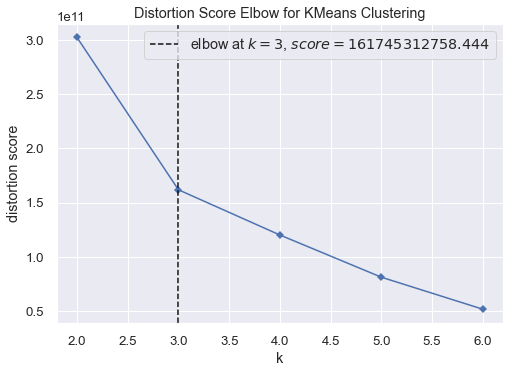

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [74]:
clusters = [2, 3, 4, 5, 6]
kmeans = KElbowVisualizer( c.KMeans(), k=clusters, timings=False )
kmeans.fit( X )
kmeans.show()

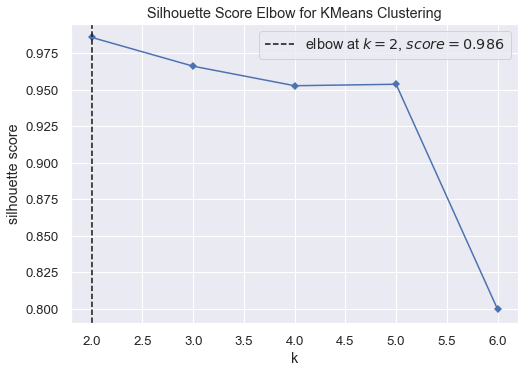

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [75]:
kmeans = KElbowVisualizer( c.KMeans(), k=clusters, metric='silhouette', timings=False )
kmeans.fit( X )
kmeans.show()

### 7.1 SILHOUETTE ANALYSIS

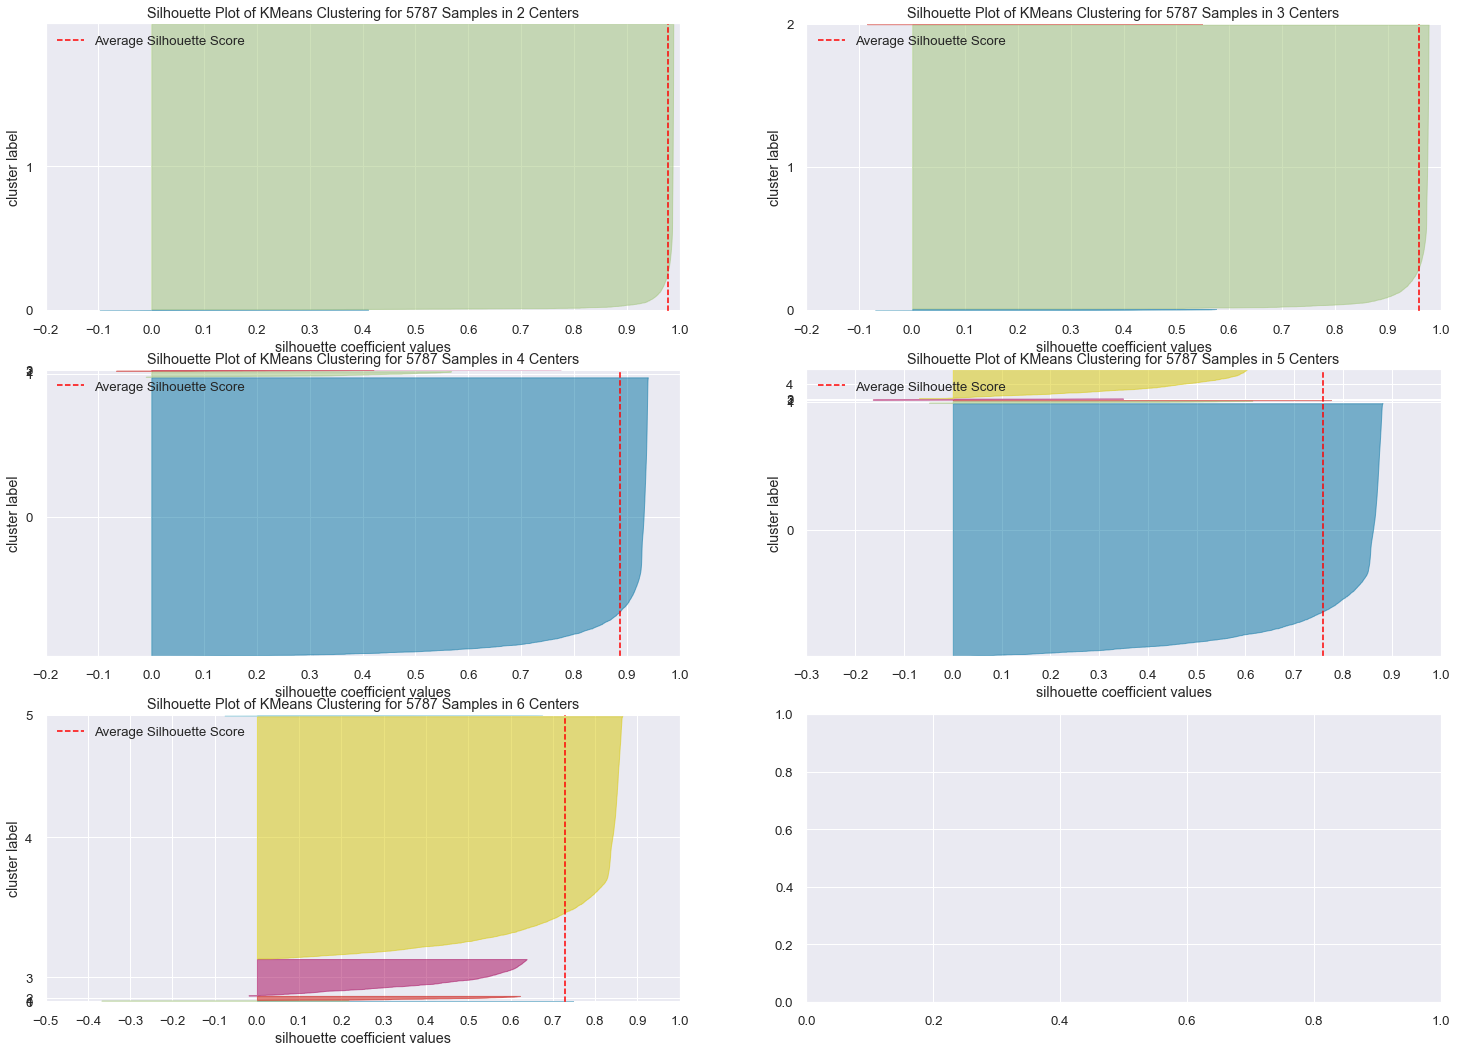

In [76]:
fig, ax = plt.subplots( 3, 2, figsize=(25, 18) )

for k in clusters:
    km = c.KMeans( n_clusters=k, init='random', n_init=10, max_iter=100, random_state=42 )
    q, mod = divmod( k, 2 )
    
    visualizer = SilhouetteVisualizer( km, colors='yellowbrick', ax=ax[q-1][mod] )
    visualizer.fit( X )
    visualizer.finalize()

In [80]:
# chossing k in terms of WSS and SS
aux_dict = { 'k':[], 'WSS':[], 'SS':[] }

for k in clusters:
    kmeans = c.KMeans( init='random', n_clusters=k, n_init=10, max_iter=300 )
    # model training
    kmeans.fit( X )
    # clustering
    labels = kmeans.labels_
    
    aux_dict['k'].append(k)
    aux_dict['WSS'].append(kmeans.inertia_)
    aux_dict['SS'].append(metrics.silhouette_score( X, labels, metric='euclidean' ))

df_wss_ss_results = pd.DataFrame.from_dict(aux_dict)
df_wss_ss_results
    

k           WSS        SS
0  2  3.252117e+11  0.977132
1  3  1.691294e+11  0.958841
2  4  1.218685e+11  0.886945
3  5  1.031692e+11  0.758811
4  6  7.767010e+10  0.727988

K = 4 is choosen due to good a SS score and good WSS score.

In comporarison with k=3, although k=4 SS score is 7,3% lower, but it's WSS is 30% lower.

note: WSS mesures cluster compactness, thus we look for lowest values / SS mesures cluster separation, thus we look for highest values

## 8 MODEL TRAINING

In [81]:
# k=4 chosen
kmeans = c.KMeans( init='random', n_clusters=4, n_init=10, max_iter=300 )
    
# model training
kmeans.fit( X )

# clustering
labels = kmeans.labels_

## 9 CLUSTER ANALYSIS

In [82]:
df9 = df6.copy()
df9['cluster'] = labels
df9.head()

country  is_devolution  total_devol  total_bought  \
12346  United Kingdom              1     -77183.6      77183.60   
12347         Iceland              0          0.0       4310.00   
12348         Finland              0          0.0       1437.24   
12349           Italy              0          0.0       1457.55   
12350          Norway              0          0.0        294.40   

       gross_revenue  avg_ticket  frequency  mean_recency  recency  cluster  
12346           0.00    38591.80          0        400.00      325        1  
12347        4310.00       23.68        182         60.83        2        0  
12348        1437.24       53.23         27         94.33       75        0  
12349        1457.55       20.24         72        400.00       18        0  
12350         294.40       18.40         16        400.00      310        0

### 9.1 CLUSTER VIZUALIZATION

In [83]:
# clusters visualization
fig = px.scatter_3d( df9, x='mean_recency', y='frequency', z='total_bought', color='cluster' )
fig.show()

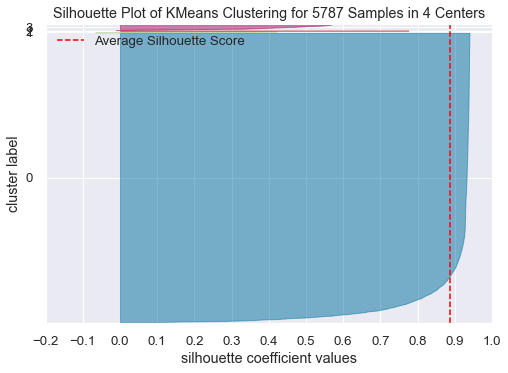

In [84]:
# silhouette
visualizer = SilhouetteVisualizer( kmeans, colors='yellowbrick' )
visualizer.fit( X )
visualizer.finalize()

### 9.2 PAIR PLOT

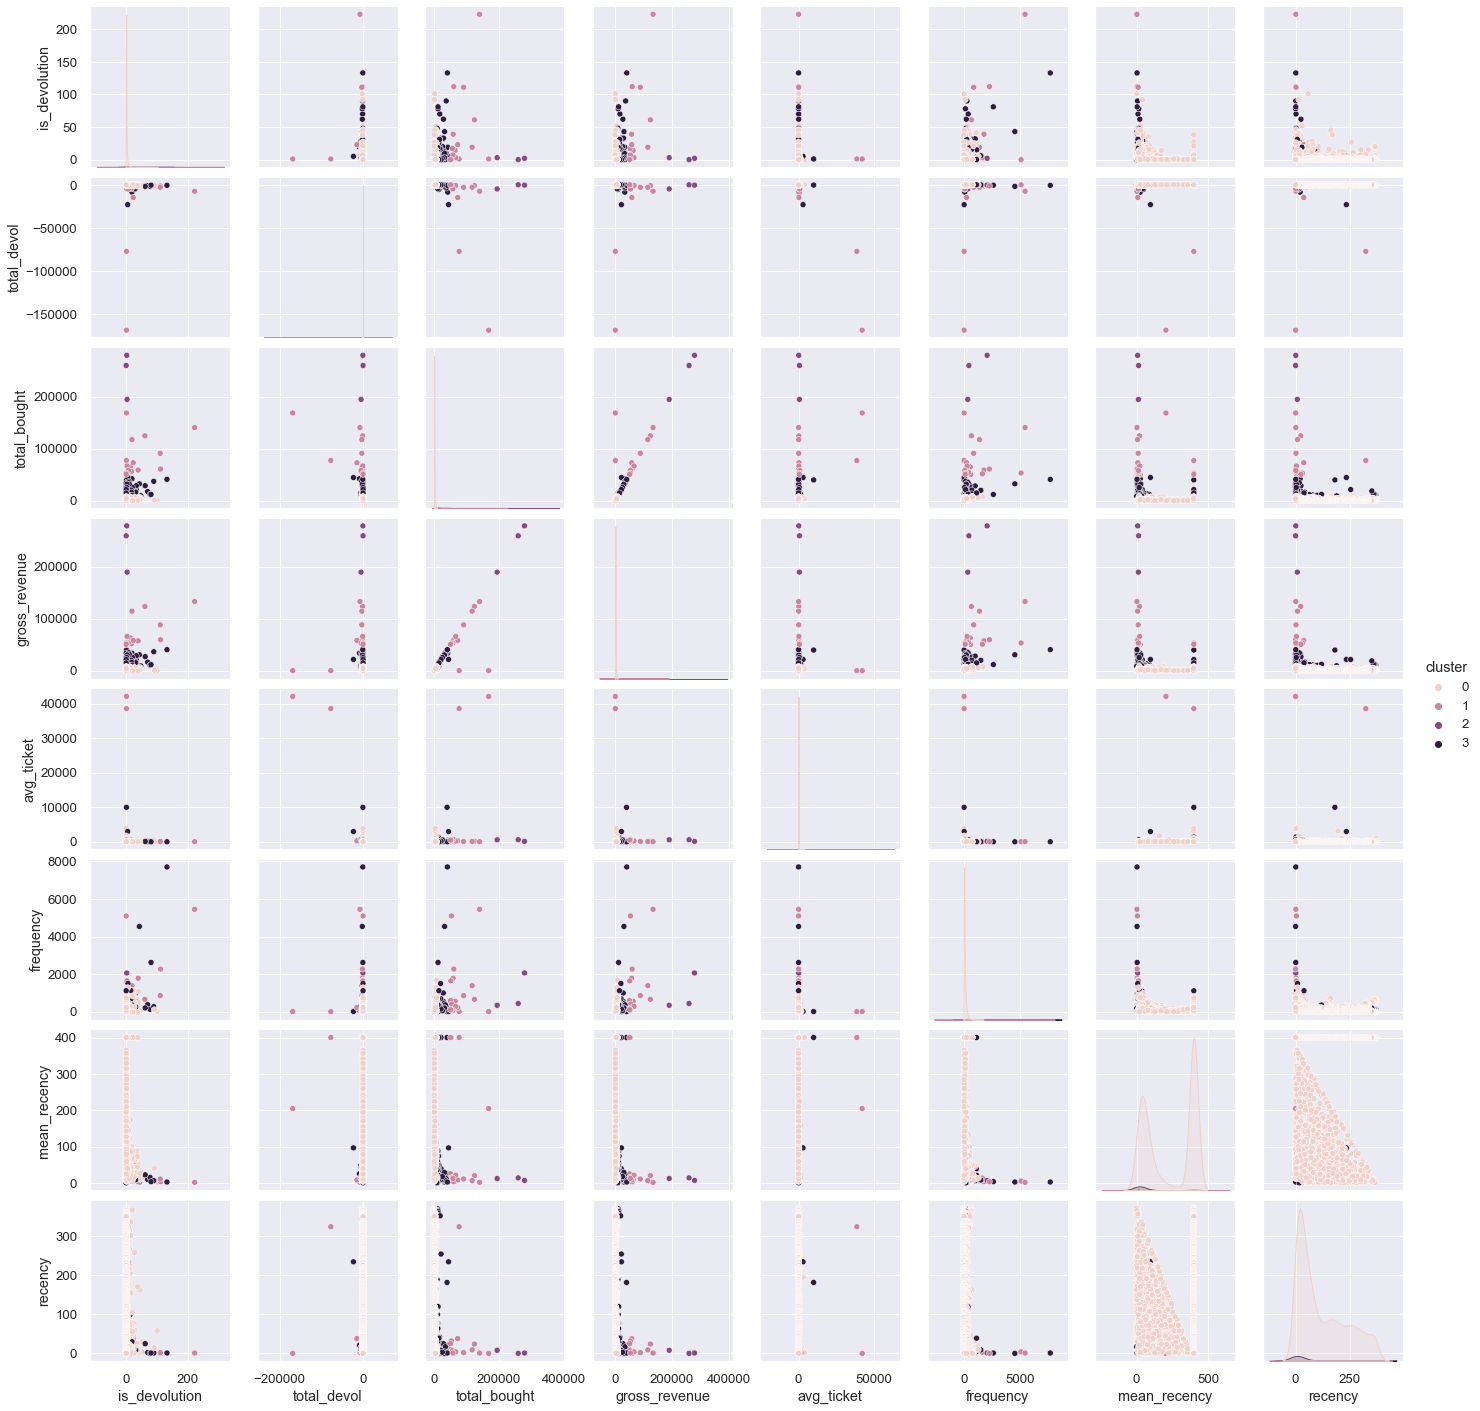

In [85]:
sns.pairplot( df9, hue='cluster' )

### 9.3 UMAP - HIGH DIMENSION VISUALIZATION

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

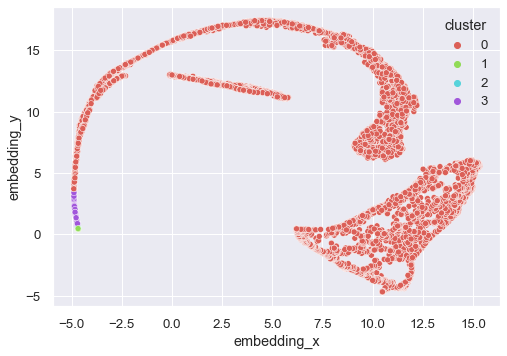

In [86]:
reducer = umap.UMAP( n_neighbors=50, random_state=42 )
embedding = reducer.fit_transform( X )

# embedding
df9['embedding_x'] = embedding[:, 0]
df9['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot( x='embedding_x', y='embedding_y', 
                 hue='cluster', 
                 palette=sns.color_palette( 'hls', n_colors=len( df9['cluster'].unique() ) ),
                 data=df9 )


### 9.4 CLUSTER PROFILE

In [87]:
df9_aux1 = df9.reset_index().rename(columns={'index':'customer_id'})

In [89]:
# Number of customer
df_cluster = df9_aux1[['customer_id', 'cluster']].groupby( 'cluster' ).count().reset_index()
df_cluster['perc_customer'] = 100*( df_cluster['customer_id'] / df_cluster['customer_id'].sum() )

# Avg Gross revenue
df_avg_gross_revenue = df9_aux1[['gross_revenue', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_gross_revenue, how='inner', on='cluster' )

# Avg recency days
df_avg_recency_days = df9_aux1[['recency', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_recency_days, how='inner', on='cluster' )

## Avg invoice_no
#df_invoice_no = df9_aux1[['invoice_no', 'cluster']].groupby( 'cluster' ).mean().reset_index()
#df_cluster = pd.merge( df_cluster, df_invoice_no, how='inner', on='cluster' )
#
## Avg Ticket
#df_ticket = df9_aux1[['avg_ticket', 'cluster']].groupby( 'cluster' ).mean().reset_index()
#df_cluster = pd.merge( df_cluster, df_ticket, how='inner', on='cluster' )

df_cluster

cluster  customer_id  perc_customer  gross_revenue     recency
0        0         5652      97.667185    1088.089616  119.221515
1        1           19       0.328322   62134.527895   25.947368
2        2            3       0.051840  242723.616667    3.000000
3        3          113       1.952652   15298.061416   35.035398

In [91]:
df9_aux1['% customers'] = 1

df_profile = df9_aux1.groupby(['cluster']).agg({ 'is_devolution':np.mean, 'total_devol':np.mean, 
                                                 'total_bought':np.mean, 'gross_revenue':np.mean, 
                                                 'frequency':np.mean,'mean_recency':np.mean,
                                                 'recency':np.mean, '% customers':np.sum})

df_profile['% customers'] = df_profile['% customers'].apply(lambda x: 100*(x/len(df9_aux1) ))

df_profile

is_devolution   total_devol   total_bought  gross_revenue  \
cluster                                                              
0             1.159236    -20.702631    1108.792247    1088.089616   
1            33.736842 -15285.055789   77419.583684   62134.527895   
2             1.666667  -1725.086667  244448.703333  242723.616667   
3            13.548673   -648.123274   15946.184690   15298.061416   

           frequency  mean_recency     recency  % customers  
cluster                                                      
0          78.565464    233.340870  119.221515    97.667185  
1        1132.526316     83.375263   25.947368     0.328322  
2         941.000000     11.780000    3.000000     0.051840  
3         445.061947     56.794956   35.035398     1.952652

## 10 DEPLOY